# **Machine Learning para Business Intelligence** 
#### Profesor: Santiago Neira Hernández

## Clase 4. Clasificación - KNN SVM y métricas
Habiendo visto los algoritmos de regresión, veamos la implementación de algunos algoritmos de clasificación binaria. El propósito del presente notebook es mostrar:
1. Implementación del algoritmo de KNN
2. Visualización del tuning por híper-parámetro en KNN
3. Implementación del algoritmo de SVM
4. Algunas métricas para medir la efectividad de los diferentes modelos

**Disclaimer: La base que vamos a usar está limpia (caso muy extraño en la vida real). Para que los modelos corran NO PUEDEN haber nulos en ninguna variable** 

In [1]:
##Paquetes que vamos a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay



### 1.K-NN 
Inspeccionemos inicialmente la base con la que vamos a trabajar.Estaremos trabajando con una base de clientes sobre los cuales tenemos información demográfica y si compraron o no el producto que nosotros vendemos. Esta base tiene 5 variables (Identificador, Género, Edad, Salario Estimado, Y una variable categórica de si compró un producto o no)

In [2]:
## Importación de la base
datos=pd.read_csv("../Datos/Social_Network_Ads.csv")
datos.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
datos.shape

(400, 5)

In [4]:
##Inspección simple
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
###Separemos la base entre covariables y etiqueta
x = datos.iloc[:,2:4]
y = datos.iloc[:,-1]

In [6]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

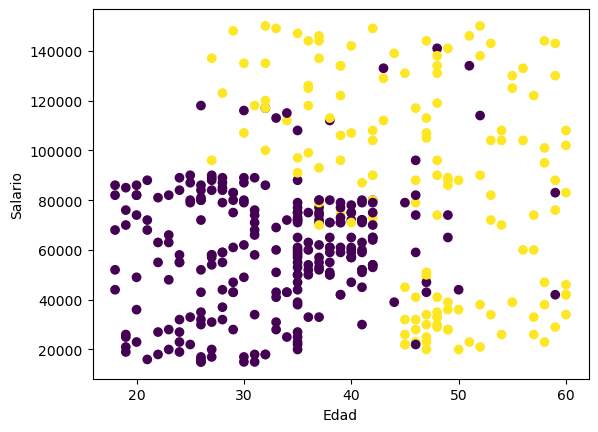

In [8]:
### Veamos cómo se separan los datos visualmente, con base en la etiqueta
plt.scatter(x['Age'],x['EstimatedSalary'],c=y)
plt.xlabel("Edad")
plt.ylabel("Salario")
plt.show()

In [9]:
### Es buena práctica (por temas de dimensionalidad) estandarizar las variables
scaler= StandardScaler()
x=scaler.fit_transform(x)

In [10]:
### Train-test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
print(x_train.shape)
print(y_train.shape)


(320, 2)
(320,)


In [11]:
print(x_test.shape)
print(y_test.shape)

(80, 2)
(80,)


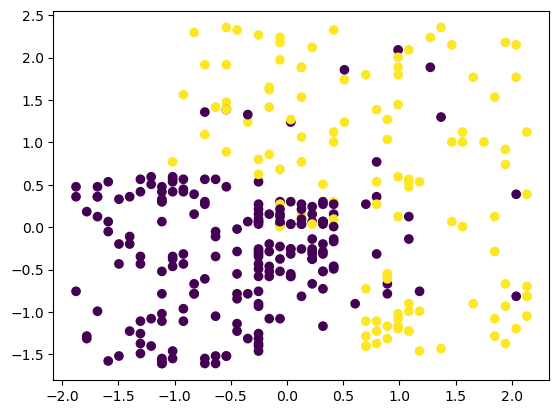

In [12]:
##Veamos la nueva gráfica en los datos para entrenar
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)

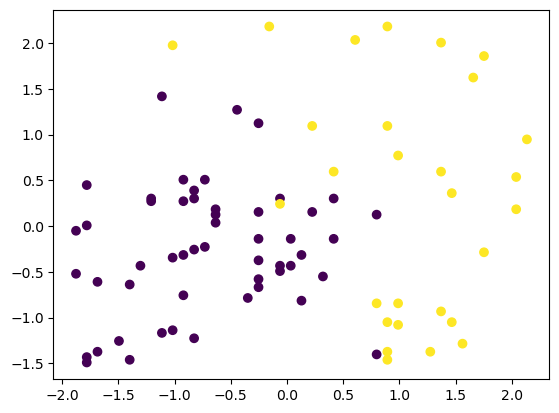

In [13]:
##La misma gráfica en los datos test
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)

In [14]:
###Ahora sí, manos a la obra... ¡Encontremos nuestra primera predicción!
knn= KNeighborsClassifier(n_neighbors=5)

##Entrenamos nuestro modelo
knn.fit(x_train,y_train)

##Evaluamos 
y_pred=knn.predict(x_test)

error=(y_pred!=y_test).mean()*100

print(f"Predijimos un {error}% de datos en test incorrectamente")


Predijimos un 7.5% de datos en test incorrectamente


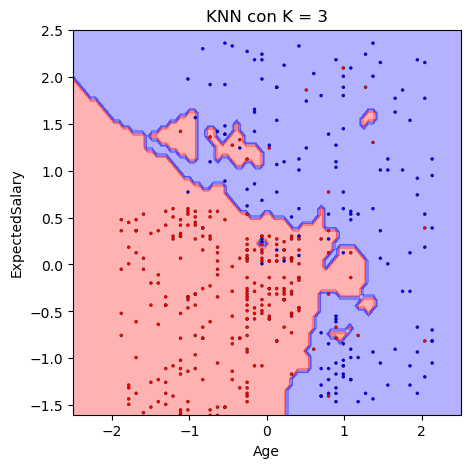

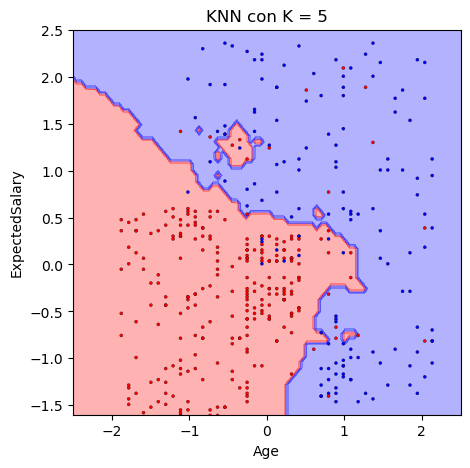

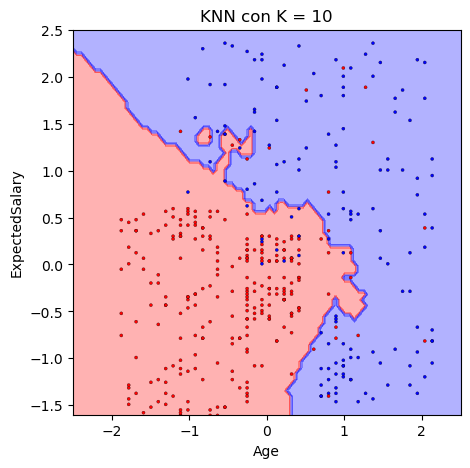

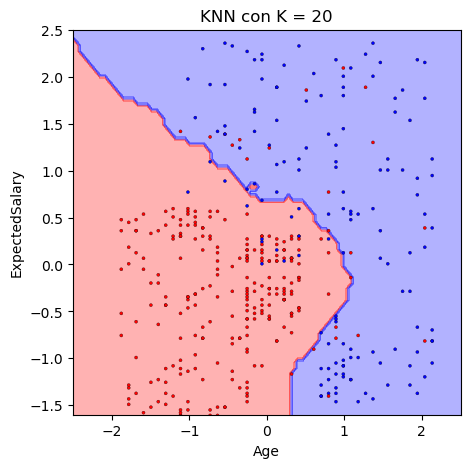

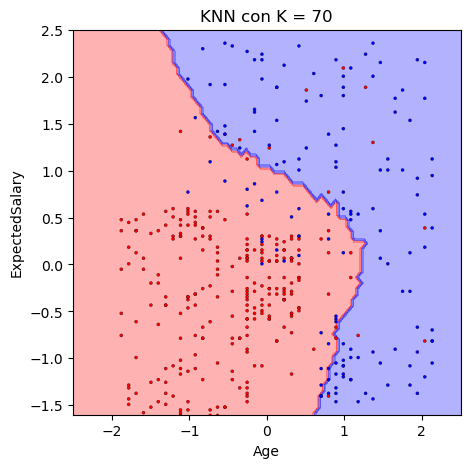

In [15]:
from matplotlib.colors import ListedColormap
### Visualicemos la frontera de decisión a medida que el número de vecinos aumenta

cmap_py = ListedColormap(["Red", "blue"])
modelos={}
for k in [3, 5, 10,20,70]:
    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(x, y)
    modelos["neigh" + str(k)] = neigh

    
    fig, ax = plt.subplots(figsize = (5, 5))

    disp = DecisionBoundaryDisplay.from_estimator(estimator = modelos["neigh" + str(k)],  X = x, cmap = cmap_py,
    ax = ax, response_method = "predict", plot_method = "contourf",
    xlabel = "Age", ylabel = "ExpectedSalary", alpha = 0.3)

    plt.scatter(x[:,0], x[:,1], s=5, c=y, cmap=cmap_py, edgecolor="k", linewidths=0.2)
    plt.xlim(-2.5,2.5)
    plt.ylim(-1.6,2.5)
    plt.title("KNN con K = "+str(k))
    plt.show()




## 2. Fine Tuning en el algoritmo de KNN

In [16]:
## Escogencia del hiperparámetro K
vecinos = list(range(2, 100, 2))

errores_insample = []
errores_outsample = []
for k in vecinos:
    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(x_train, y_train)
    y_hat_insample = neigh.predict(x_train)
    y_hat_outsample = neigh.predict(x_test)

    error_insample = (y_hat_insample != y_train).mean()
    errores_insample.append(error_insample)
    error_outsample = (y_hat_outsample != y_test).mean()
    errores_outsample.append(error_outsample)

resultados = pd.DataFrame({"K": vecinos, "Error de entrenamiento": errores_insample, "Error de prueba": errores_outsample})


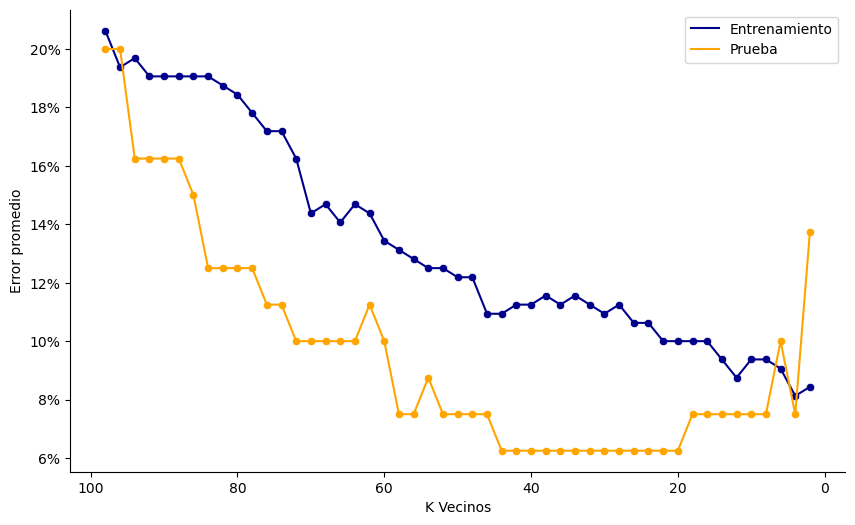

In [17]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
sns.despine()

sns.lineplot(data = resultados, x = "K", y = "Error de entrenamiento", ax = ax, color = "darkblue")
sns.scatterplot(data = resultados, x = "K", y = "Error de entrenamiento", ax = ax, color = "darkblue")
sns.lineplot(data = resultados, x = "K", y = "Error de prueba", ax = ax, color = "orange")
sns.scatterplot(data = resultados, x = "K", y = "Error de prueba", ax = ax, color = "orange")
ax.legend(handles = ax.lines, labels = ["Entrenamiento", "Prueba", "Error irreducible"])

ax.set_xlabel("K Vecinos")
ax.set_ylabel("Error promedio")
ax.invert_xaxis()
ax.yaxis.set_major_formatter("{x:.0%}")

Del ejercicio anterior podríamos ver entonces que el número de vecinos óptimo es $K=20$, y que tendremos un error de predicción cercano al $6\%$

### 3.SVM
Veamos ahora la resolución al problema de clasificación cuando queremos implementar una SVM.


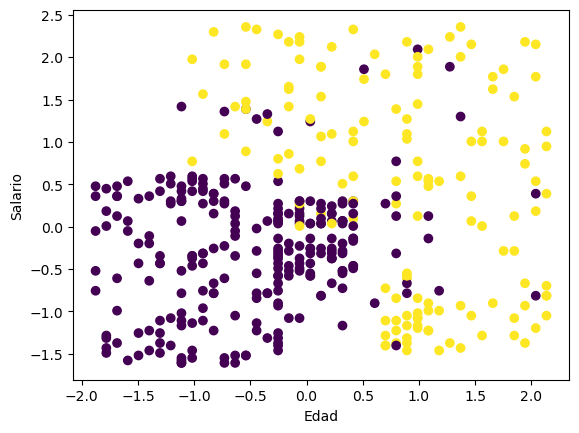

In [18]:
### Recordemos la gráfica de las dos covariables
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel("Edad")
plt.ylabel("Salario")
plt.show()

Si intentamos hacer una SVM con kernel lineal habrán muchos clasificados de manera incorrecta....

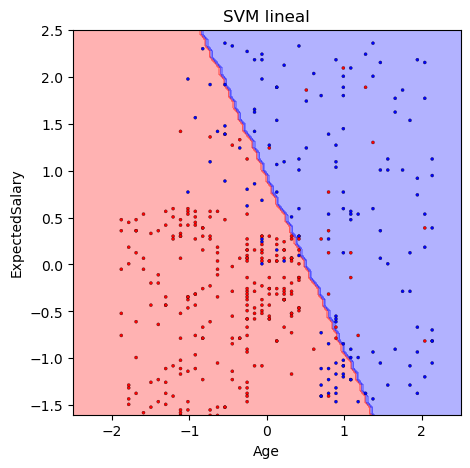

In [19]:
from sklearn import svm
model_svm = svm.SVC(kernel='linear', random_state=1,C=100)
model_svm.fit(x,y)
fig, ax = plt.subplots(figsize = (5, 5))

disp = DecisionBoundaryDisplay.from_estimator(estimator = model_svm,  X = x, cmap = cmap_py,
ax = ax, response_method = "predict", plot_method = "contourf",
xlabel = "Age", ylabel = "ExpectedSalary", alpha = 0.3)

plt.scatter(x[:,0], x[:,1], s=5, c=y, cmap=cmap_py, edgecolor="k", linewidths=0.2)
plt.xlim(-2.5,2.5)
plt.ylim(-1.6,2.5)
plt.title("SVM lineal")
plt.show()


In [20]:
model_svm.fit(x_train,y_train)
y_pred_svm_naive=model_svm.predict(x_test)
error=(y_pred_svm_naive!=y_test).mean()*100

print(f"Predijimos un {error:5.2f}% de datos en test incorrectamente")


Predijimos un 13.75% de datos en test incorrectamente


{'svm_1': SVC(gamma=1, random_state=1)}


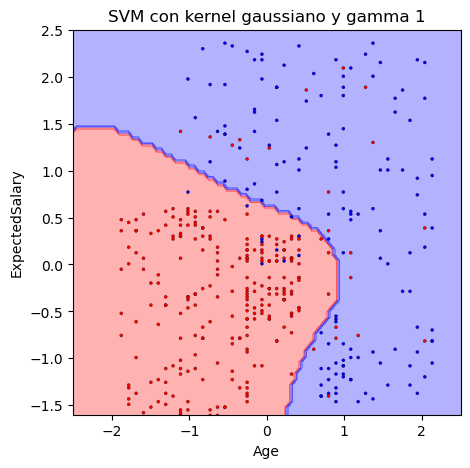

{'svm_1': SVC(gamma=1, random_state=1), 'svm_5': SVC(gamma=5, random_state=1)}


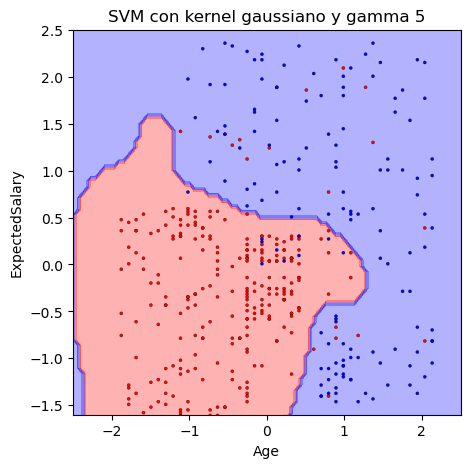

{'svm_1': SVC(gamma=1, random_state=1), 'svm_5': SVC(gamma=5, random_state=1), 'svm_15': SVC(gamma=15, random_state=1)}


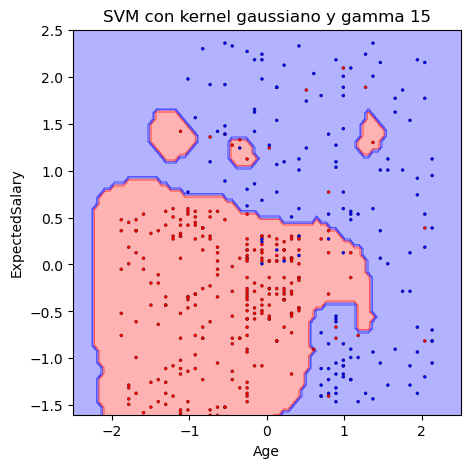

In [21]:
##Hagamos un SVM con kernel gaussiano
model_svm={}
gammas=[1,5,15]
for gamma in gammas:
    model_g = svm.SVC(kernel='rbf', random_state=1,gamma=gamma)
    model_g.fit(x, y)
    model_svm["svm_" + str(gamma)] = model_g
    print(model_svm)
    fig, ax = plt.subplots(figsize = (5, 5))

    disp = DecisionBoundaryDisplay.from_estimator(estimator = model_svm["svm_" + str(gamma)],  X = x, cmap = cmap_py,
    ax = ax, response_method = "predict", plot_method = "contourf",
    xlabel = "Age", ylabel = "ExpectedSalary", alpha = 0.3)

    plt.scatter(x[:,0], x[:,1], s=5, c=y, cmap=cmap_py, edgecolor="k", linewidths=0.2)
    plt.xlim(-2.5,2.5)
    plt.ylim(-1.6,2.5)
    plt.title("SVM con kernel gaussiano y gamma "+str(gamma))
    plt.show()


In [22]:
## Ejercicio- repita el proceso de construcción de la gráfica de escogencia del hiperparámetro para KNN, 
# fijando un SVM con kernel gaussiano y C=1. Qué valor de gamma minimiza el error en test? 

## 4. Métricas de evaluación
Veamos algunas métricas de evaluación de algoritmos y cómo hacer un _fine-tuning_ a los híper parámetros teniendo en cuenta cuáles son las métricas relevantes.

In [23]:
##Un primer paso para identificar cuál métrica deberíamos usar, es ver el balanceo de las categorías en la muestra:
datos['Purchased'].value_counts(normalize=True)

Purchased
0    0.6425
1    0.3575
Name: proportion, dtype: float64

Está desbalanceado, pero no nos preocupamos inicialmente por esto. Es señal de alarma (por regla de pulgar) cuando hay una categoría con <10%

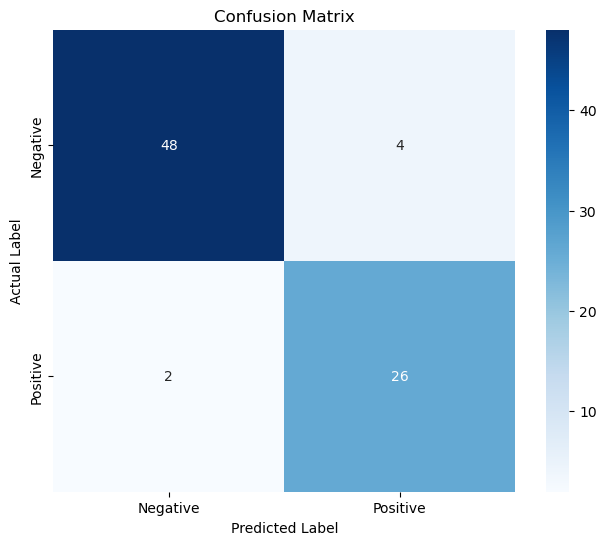

[[48  4]
 [ 2 26]]


In [24]:
##Recordemos el knn
from sklearn import metrics
from sklearn.metrics import confusion_matrix

knn= KNeighborsClassifier(n_neighbors=5)

##Entrenamos nuestro modelo
knn.fit(x_train,y_train)

##Matriz de confusión
y_pred=knn.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
print(cm)

In [25]:
##Accuracy
acc=metrics.accuracy_score(y_test,y_pred)
print("El accuracy score es " + str(acc))

##Precision
pre=metrics.precision_score(y_test,y_pred)
print("El precision score es " + str(acc))

##Recall
rec=metrics.recall_score(y_test,y_pred)
print("El precision score es " + str(rec))

##f1-score
f1=metrics.f1_score(y_test,y_pred)
print("El F1 score es " + str(f1))

##f_0.5 score
fhalf=metrics.fbeta_score(y_test,y_pred,beta=0.5)
print("El F_0.5 score es " + str(fhalf))

El accuracy score es 0.925
El precision score es 0.925
El precision score es 0.9285714285714286
El F1 score es 0.896551724137931
El F_0.5 score es 0.8783783783783786


## Fine tuning con KNN

In [26]:
##Hagamos un hiper-parameter tuning con knn
from sklearn.model_selection import GridSearchCV
knn_model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': list(range(1, 60, 2))
}
##Buscamos en grilla
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

##Estamos haciendo cross-validación, sólamente hay que hacer un fit.
grid_search_knn.fit(x, y)

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("El mejor valor de k es", best_params_knn)
print("El mejor valor del accuracy: {:.2f}".format(best_score_knn))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
El mejor valor de k es {'n_neighbors': 11}
El mejor valor del accuracy: 0.90


In [27]:
##Habrá overfitting?
knn_prueba= KNeighborsClassifier(n_neighbors=11)
##Entrenamos nuestro modelo
knn_prueba.fit(x_train,y_train)

y_pred=knn_prueba.predict(x_test)
y_pred_train=knn_prueba.predict(x_train) ##hacemos el predict en train set

acc_test=metrics.accuracy_score(y_test,y_pred)
acc_train=metrics.accuracy_score(y_train,y_pred_train)

print("Accuracy en test: {:.2f}".format(acc_test) )
print("Accuracy ent train: {:.2f}".format(acc_train))

Accuracy en test: 0.93
Accuracy ent train: 0.91


## Fine tuning con SVM

In [30]:
from sklearn.model_selection import RandomizedSearchCV
svm_model = svm.SVC()
param_grid_svm = {
    'C': np.logspace(-3, 2, 10),
    'kernel': ['linear', 'rbf'],
    'gamma':  np.logspace(-3, 2, 10)
}
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_grid_svm, n_iter=45, cv=5, scoring='accuracy', random_state=42, verbose=1)

random_search.fit(x, y)

best_params_svm = random_search.best_params_
best_score_svm = random_search.best_score_

print("La mejor combinación de parámetros es", best_params_svm)
print("El mejor valor del accuracy: {:.2f}".format(best_score_svm))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
La mejor combinación de parámetros es {'kernel': 'rbf', 'gamma': 2.1544346900318843, 'C': 0.1668100537200059}
El mejor valor del accuracy: 0.90


In [31]:
##Ejercicio -> evalúe si hay overfitting 

In [32]:
##Juegue ahora incluyendo la covariable de género. ¿Cambian los resultados?